# Develop machine learning models to classify notMNIST images

**Author:** Andrea Murphy 

### Initial Setup and Imports

In [1]:
#Imports
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Input, Conv2D, SeparableConv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import sgd, Adam
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input/comp-850-project-1/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


/kaggle/input/comp-850-project-1/ytr.npy
/kaggle/input/comp-850-project-1/xte.npy
/kaggle/input/comp-850-project-1/xtr.npy
/kaggle/input/comp-850-project-1/sample_submission.csv


In [2]:
#Define the data
xtr = np.load('../input/comp-850-project-1/xtr.npy')
xte = np.load('../input/comp-850-project-1/xte.npy')
ytr = np.load('../input/comp-850-project-1/ytr.npy')

### Images from the uncleaned data

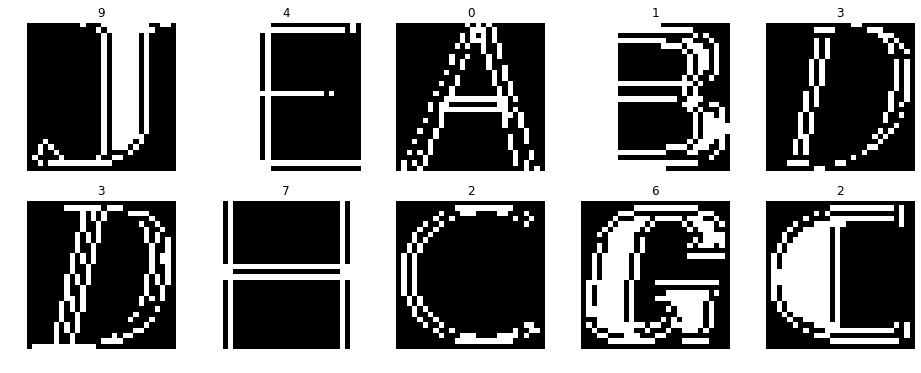

In [3]:
# Plot Sample Images
fig, ax = plt.subplots(2, 5, figsize=(16, 6))
for i in range(5):
    for j in range(2):
        idx = np.random.randint(low=0, high=60000, size=1)[0]
        ax[j, i].imshow(xtr[idx, :, :], cmap='gray')
        ax[j, i].set_title(ytr[idx])
        ax[j, i].axis('off')

### Create Model

In [4]:
from keras.layers.normalization import BatchNormalization
from keras import layers

model = Sequential()


model.add(Conv2D(32, 3, input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, padding='same', activation='relu'))


model.add(layers.Dropout(0.5))
model.add(Flatten())
model.add(layers.Dense(128, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# Stop training when a monitored quantity has stopped improving
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

## Preparing the Data

In [6]:
from tensorflow.keras.utils import to_categorical

xtr = np.expand_dims(xtr, -1).astype(np.float32) / 255
xte = np.expand_dims(xte, -1).astype(np.float32) / 255
ytr = to_categorical(ytr)

In [7]:
ytr.shape

(60000, 10)

### Shuffle the data 

In [8]:
shuffle_index = np.random.permutation(60000)
xtr, ytr = xtr[shuffle_index], ytr[shuffle_index]

### Define parameters for training and fit the model

In [9]:
history = model.fit(xtr, ytr, 
                    validation_split=0.2,
                    batch_size=64, epochs=50,
                    callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 189us/step - loss: 0.9435 - acc: 0.7182 - val_loss: 0.6943 - val_acc: 0.7913
Epoch 2/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.6865 - acc: 0.7998 - val_loss: 0.5887 - val_acc: 0.8254
Epoch 3/50
48000/48000 [==============================] - 5s 101us/step - loss: 0.6344 - acc: 0.8131 - val_loss: 0.5581 - val_acc: 0.8315
Epoch 4/50
48000/48000 [==============================] - 5s 100us/step - loss: 0.6015 - acc: 0.8214 - val_loss: 0.5353 - val_acc: 0.8382
Epoch 5/50
48000/48000 [==============================] - 5s 104us/step - loss: 0.5805 - acc: 0.8276 - val_loss: 0.5254 - val_acc: 0.8403
Epoch 6/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.5608 - acc: 0.8299 - val_loss: 0.5239 - val_acc: 0.8435
Epoch 7/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.5519 - acc: 0.8343 - val_loss: 0.5424 - val

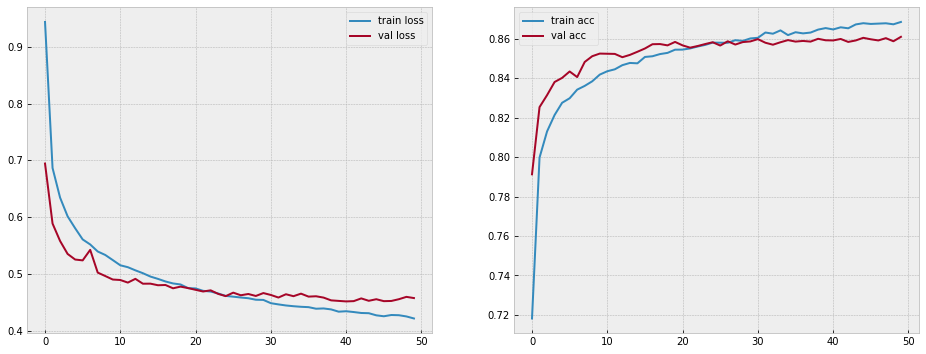

In [10]:
plt.style.use('bmh')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].legend()
ax[1].plot(history.history['acc'], label='train acc')
ax[1].plot(history.history['val_acc'], label='val acc')
ax[1].legend()

In [11]:
print(history.history['acc'])

[0.7181875, 0.7998125, 0.81308335, 0.8214167, 0.827625, 0.82991666, 0.83429164, 0.8361875, 0.8385208, 0.8419167, 0.843625, 0.8446042, 0.84670836, 0.84783334, 0.8476458, 0.850875, 0.8512292, 0.8523333, 0.8529375, 0.8545625, 0.8546042, 0.8551875, 0.85616666, 0.8569792, 0.85814583, 0.85810417, 0.8580625, 0.859375, 0.8590208, 0.86027086, 0.8605833, 0.8632708, 0.86266667, 0.8643542, 0.8619583, 0.8634167, 0.8628333, 0.86325, 0.86475, 0.86552083, 0.86483335, 0.86591667, 0.86541665, 0.867375, 0.868, 0.867625, 0.86779165, 0.8679583, 0.8674375, 0.868625]


### Prediction scores

In [12]:
# make predictions
pred = model.predict(xte)
categorical_pred = np.argmax(pred, axis=1)

### Create submission.csv file 

In [13]:
submission = pd.read_csv('/kaggle/input/comp-850-project-1/sample_submission.csv')
submission['Category'] = categorical_pred
submission.to_csv('submission_Murphy.csv', index=False)